In [6]:
%load_ext lab_black

In [25]:
import jieba
import wordcloud
from PIL import Image
import pandas as pd
import numpy as np
from wordcloud import WordCloud, get_single_color_func
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel("data\苏州二手房.xlsx")

In [9]:
e = "".join([str(i) for i in df.title.tolist()])

In [19]:
class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
    specified colors to certain words based on the color to words mapping.
    Uses wordcloud.get_single_color_func
    Parameters
    ----------
    color_to_words : dict(str -> list(str))
      A dictionary that maps a color to the list of words.
    default_color : str
      Color that will be assigned to a word that's not a member
      of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()
        ]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func
                for (color_func, words) in self.color_func_to_words
                if word in words
            )
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
    to certain words based on the color to words mapping
    Parameters
    ----------
    color_to_words : dict(str -> list(str))
      A dictionary that maps a color to the list of words.
    default_color : str
      Color that will be assigned to a word that's not a member
      of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {
            word: color for (color, words) in color_to_words.items() for word in words
        }

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

In [38]:
color_to_words = {
    # words below will be colored with a green single color function
    "#800000": ["精装", "户型", "采光", "朝南", "地铁"],
    # will be colored with a red single color function
    "red": [
        "ugly",
        "implicit",
        "complex",
    ],
}

default_color = "grey"
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

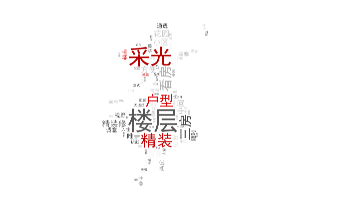

In [40]:
str1 = " ".join(jieba.cut(e))
wc = wordcloud.WordCloud(
    mask=np.array(Image.open(r"pic/aa.jpg")),
    collocations=False,
    font_path="C:/Windows/Fonts/simhei.ttf",
    background_color="white",
    width=1000,
    height=800,
    mode="RGBA",
    scale=15,
    stopwords=["出售", "诚心"],
    color_func=grouped_color_func,
).generate(str1)
wc.to_file(f"pic/总词云.png")

plt.imshow(wc)
plt.axis("off")
plt.show()